
Répartitions des données:



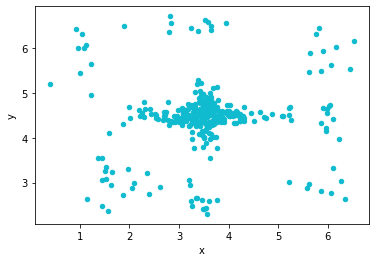



4-1 Feuille de décision:



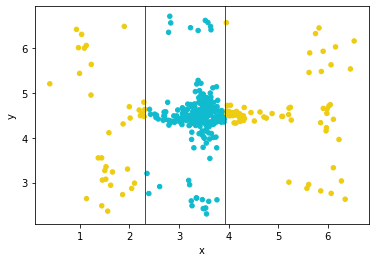


Evaluation du modèle:

Exactitude: 0.7818181818181819
Exactitude ponderee: 0.74975
Précision: 0.5392156862745098
Rappel: 0.6875



4-2 Arbre de décision:



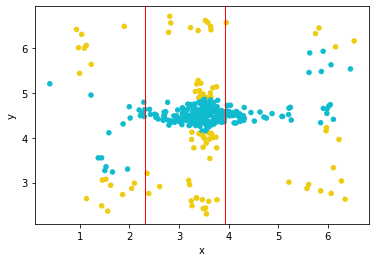


Evaluation du modèle:

Exactitude: 0.8393939393939394
Exactitude ponderee: 0.8005
Précision: 0.651685393258427
Rappel: 0.725



4-3 Arbre de décision (Algorithme amélioré):


Arbre de hauteur: 1



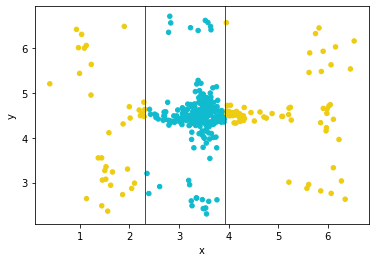


Evaluation du modèle:

Exactitude: 0.7818181818181819
Exactitude ponderee: 0.74975
Précision: 0.5392156862745098
Rappel: 0.6875


Arbre de hauteur: 2



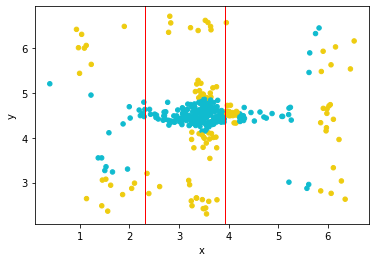


Evaluation du modèle:

Exactitude: 0.806060606060606
Exactitude ponderee: 0.804
Précision: 0.5714285714285714
Rappel: 0.8


Arbre de hauteur: 3



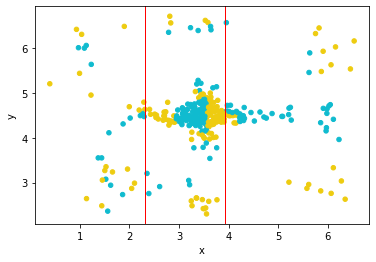


Evaluation du modèle:

Exactitude: 0.5696969696969697
Exactitude ponderee: 0.5714999999999999
Précision: 0.2987012987012987
Rappel: 0.575


Arbre de hauteur: 4



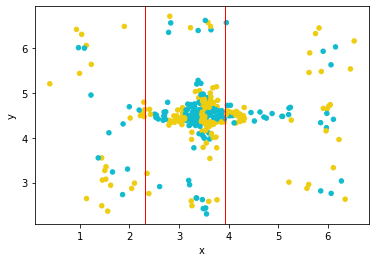


Evaluation du modèle:

Exactitude: 0.48787878787878786
Exactitude ponderee: 0.5175
Précision: 0.2541436464088398
Rappel: 0.575



In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np

import Functions as Functions
from Node import *


##################################################################################
## 1- Preparation des données
##################################################################################

x = []
y = []
c = []

with open('data.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(float(row[0]))
        y.append(float(row[1]))
        c.append(float(row[2]))

plt.scatter(x, y, s=20, color='#10bbcf', label='Liers Data Frame')

plt.xlabel('x')
plt.ylabel('y')
print('\nRépartitions des données:\n')
plt.show()
x = np.array(x)
y = np.array(y)
data = (x, y, c)
data = np.array(data)
data = data.T
attribIdx = [c for c in range( data.shape[1] - 1 )]


###################################################################################
## 4-1: Feuille de décision
###################################################################################

print('\n\n4-1 Feuille de décision:\n')

attr, listAttr = Functions.Functions.meilleur_attribut( data.T, attribIdx )
classes, seuils = Functions.Functions.k_means( data.T[attr] )
dl = DecisionLeaf(data, attr)
tp, tn, fp, fn = dl.evaluer()
exactitude = (tp + tn) / (tp+tn+fp+fn)
exactitude_ponderee = ( (tp/(tp+fn)) + (tn/(tn+fp)) ) / 2
precision = tp/(tp+fp)
rappel = tp/(fn+tp)
classes = dl.classes()

# Plot
color = [0 for c in range(len(listAttr))]
for j in range(len(listAttr)):
    if classes[j] == 0:
        color[j] = '#10bbcf'
    else:
        color[j] = '#eecc10'

plt.scatter(listAttr, y, c=color, s=20, cmap='viridis')
plt.axvline(x=seuils[0],linewidth = 1,color="r")
plt.axvline(x=seuils[1],linewidth = 1,color="r")
plt.xlabel('x')
plt.ylabel('y')


plt.show()
print('\nEvaluation du modèle:')

print('\nExactitude: '+ str(exactitude) + '\nExactitude ponderee: ' + str(exactitude_ponderee) + '\nPrécision: '+ str(precision) + '\nRappel: '+ str(rappel) + '\n')


###################################################################################
## 4-2: Premier Algorithme de l'Arbre de décision
###################################################################################

print('\n\n4-2 Arbre de décision:\n')

arbre = Functions.Functions.buildDecisionTree_bis(data, True, attribIdx)
tp, tn, fp, fn = arbre.evaluer()
exactitude = (tp + tn) / (tp+tn+fp+fn)
exactitude_ponderee = ( (tp/(tp+fn)) + (tn/(tn+fp)) ) / 2
precision = tp/(tp+fp)
rappel = tp/(fn+tp)

for i in range(data.shape[0]):
    classes[i] = arbre.predict(data[i])

# Plot
color = [0 for c in range(len(listAttr))]
for j in range(len(listAttr)):
    if classes[j] == 0:
        color[j] = '#10bbcf'
    else:
        color[j] = '#eecc10'

plt.scatter(listAttr, y, c=color, s=20, cmap='viridis')
plt.axvline(x=seuils[0],linewidth = 1,color="r")
plt.axvline(x=seuils[1],linewidth = 1,color="r")
plt.xlabel('x')
plt.ylabel('y')

plt.show()
print('\nEvaluation du modèle:')
print('\nExactitude: '+ str(exactitude) + '\nExactitude ponderee: ' + str(exactitude_ponderee) + '\nPrécision: '+ str(precision) + '\nRappel: '+ str(rappel) + '\n')


###################################################################################
## 4-3: Arbre de décision Algorithme amélioré
###################################################################################

print('\n\n4-3 Arbre de décision (Algorithme amélioré):\n')
for i in range(4):
    print('\nArbre de hauteur: '+str(i+1)+'\n')
    arbre = Functions.Functions.buildDecisionTree(data, True, attribIdx, i+1)
    tp, tn, fp, fn = arbre.evaluer()
    exactitude = (tp + tn) / (tp+tn+fp+fn)
    exactitude_ponderee = ( (tp/(tp+fn)) + (tn/(tn+fp)) ) / 2
    precision = tp/(tp+fp)
    rappel = tp/(fn+tp)

    for i in range(data.shape[0]):
        classes[i] = arbre.predict(data[i])

    # Plot
    color = [0 for c in range(len(listAttr))]
    for j in range(len(listAttr)):
        if classes[j] == 0:
            color[j] = '#10bbcf'
        else:
            color[j] = '#eecc10'

    plt.scatter(listAttr, y, c=color, s=20, cmap='viridis')
    plt.axvline(x=seuils[0],linewidth = 1,color="r")
    plt.axvline(x=seuils[1],linewidth = 1,color="r")
    plt.xlabel('x')
    plt.ylabel('y')

    plt.show()
    print('\nEvaluation du modèle:')
    print('\nExactitude: '+ str(exactitude) + '\nExactitude ponderee: ' + str(exactitude_ponderee) + '\nPrécision: '+ str(precision) + '\nRappel: '+ str(rappel) + '\n')
